In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

In [2]:
data=pd.read_csv("drug200.csv")

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


FEATURE ENGINEERING

from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder=LabelEncoder()

In [6]:
data["BP"]=encoder.fit_transform(data["BP"])
data["Cholesterol"]=encoder.fit_transform(data["Cholesterol"])
data["Drug"]=encoder.fit_transform(data["Drug"])

In [7]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,0,0,25.355,0
1,47,M,1,0,13.093,3
2,47,M,1,0,10.114,3
3,28,F,2,0,7.798,4
4,61,F,1,0,18.043,0
...,...,...,...,...,...,...
195,56,F,1,0,11.567,3
196,16,M,1,0,12.006,3
197,52,M,2,0,9.894,4
198,23,M,2,1,14.020,4


In [10]:
#TRAIN TEST SPLIT

In [11]:

x = data.drop(columns = ["Age", "Sex", "Drug"], axis = 1)
y = data["Drug"]

In [12]:
x

,BP,Cholesterol,Na_to_K
0,0,0,25.355
1,1,0,13.093
2,1,0,10.114
3,2,0,7.798
4,1,0,18.043
...,...,...,...
195,1,0,11.567
196,1,0,12.006
197,2,0,9.894
198,2,1,14.020


In [13]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.shape

(160, 3)

In [17]:

y_train.shape

(160,)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()

In [20]:
model.fit(X_train, y_train)

C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
predict=model.predict(X_test)

In [23]:

accuracy_score(y_test, predict)*100

82.5

In [24]:
conf_matrix = confusion_matrix(y_test, predict)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

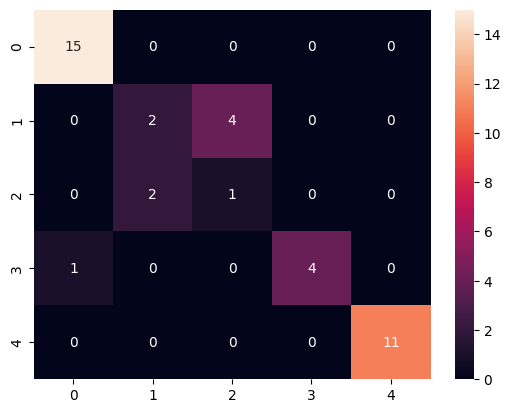

In [27]:
sns.heatmap(conf_matrix,annot=True,color="green")
plt.show()

In [28]:
import joblib

In [29]:
joblib.dump(model,"multiclass model.joblib")

['multiclass model.joblib']